# Exploring the UTx000 Extension Beacon Data
(Known as BPEACE2 in the [GH repo](https://github.com/intelligent-environments-lab/utx000))

# Sleep Survey Data Restriction
Similar to restricting the data over periods when we have gps data, this notebook looks at the sleep surveys that we have received and restricts the beacon data to nights that preceded these surveys.

## Package Import

In [1]:
import sys
sys.path.append('../')

from src.features import build_features
from src.visualization import visualize
from src.reports import make_report

import pandas as pd
import numpy as np

from datetime import datetime, timedelta

## Data Import

### Beacon Data

In [2]:
beacon_data = pd.read_csv('../data/processed/bpeace2-beacon.csv',index_col=0,parse_dates=True)
# show it off:
beacon_data.head()

,TVOC,eCO2,Lux,Visible,Infrared,NO2,T_NO2,RH_NO2,CO,T_CO,...,PM_N_4,PM_N_10,PM_C_1,PM_C_2p5,PM_C_4,PM_C_10,Beacon,Beiwe,Fitbit,REDCap
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-06-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,30,idbkjh8u,22,4
2020-06-11 00:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,30,idbkjh8u,22,4
2020-06-11 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,30,idbkjh8u,22,4
2020-06-11 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,30,idbkjh8u,22,4
2020-06-11 00:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,30,idbkjh8u,22,4


### Survey Data

In [3]:
sleep_survey = pd.read_csv('../data/processed/bpeace2-morning-survey.csv',index_col=0,parse_dates=True)
sleep_survey.head()

,ID,Content,Stress,Lonely,Sad,Energy,TST,SOL,NAW,Restful
2020-07-31 14:25:00,hfttkth7,1,2,1.0,3,0,6.0,10.0,3.0,0
2020-08-20 03:49:00,hfttkth7,1,1,0.0,1,2,7.0,20.0,1.0,1
2020-08-23 15:58:00,hfttkth7,1,1,1.0,2,0,6.0,25.0,0.0,0
2020-07-17 14:52:00,hfttkth7,1,1,0.0,1,2,7.0,20.0,3.0,2
2020-08-12 17:32:00,hfttkth7,1,3,1.0,2,2,6.0,20.0,0.0,1


# Analyzing the Sleep Survey Data
Taking a closer look at what data are available for sleep surveys.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
def label_hist(n, bins):
    '''
    Labels the histogram with values above the bars
    
    Inputs:
    - n: the counts for each bin
    - bins: the actual bins limits
    
    Returns void
    '''
    k = []
    # calculate the relative frequency of each bin
    for i in range(0,len(n)):
        k.append(round((bins[i+1]-bins[i])*n[i],0))

    # plot the label/text to each bin
    for i in range(0, len(n)):
        x_pos = bins[i] + (bins[i+1] - bins[i]) / 2
        y_pos = n[i]
        label = str(k[i])[:-2] # relative frequency of each bin
        ax.text(x_pos, y_pos, label, ha='center', va='bottom')

## Mood
Mood questions are those that ask about the participants contentment, stress, loneliness, sadness, and energy levels.

### Histogram

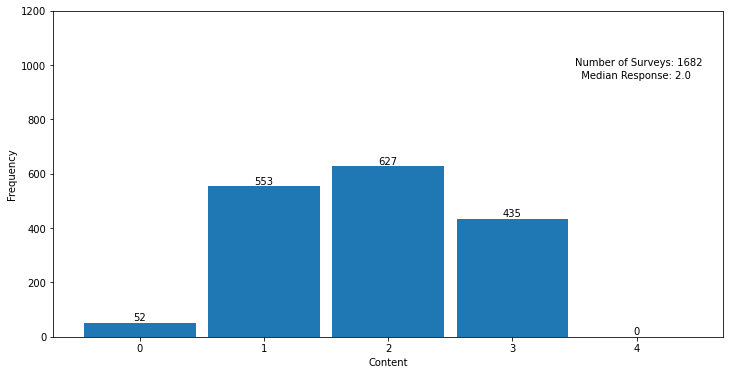

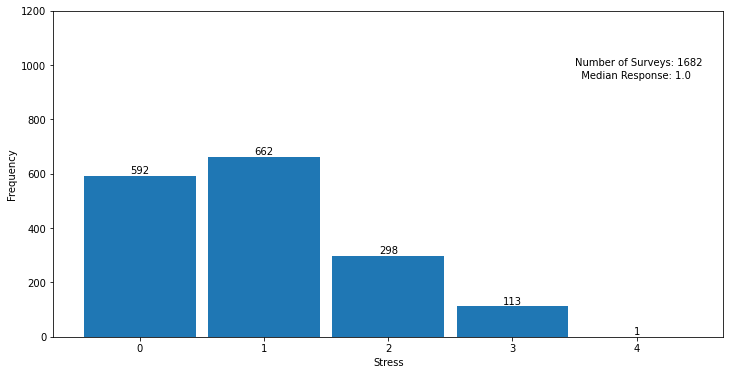

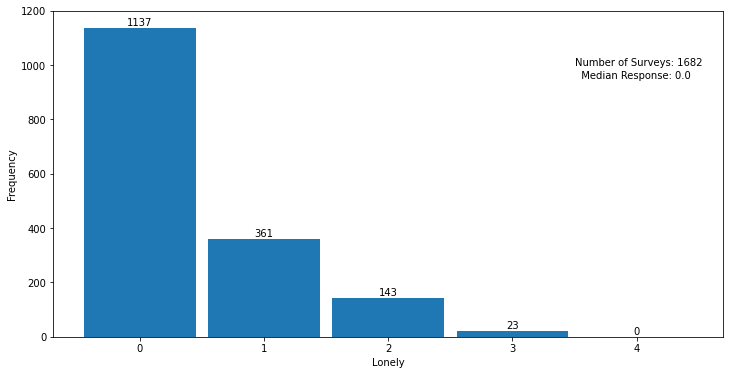

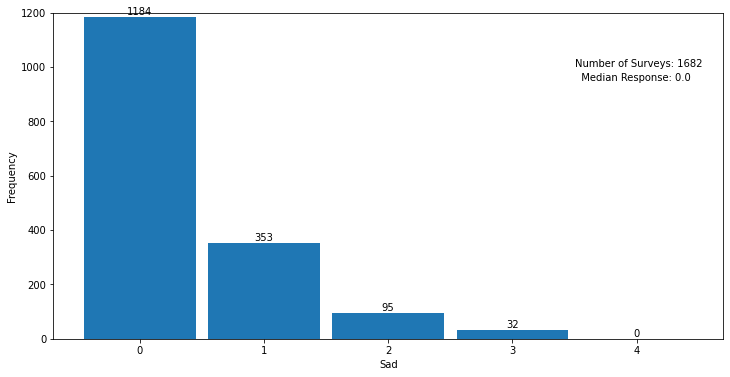

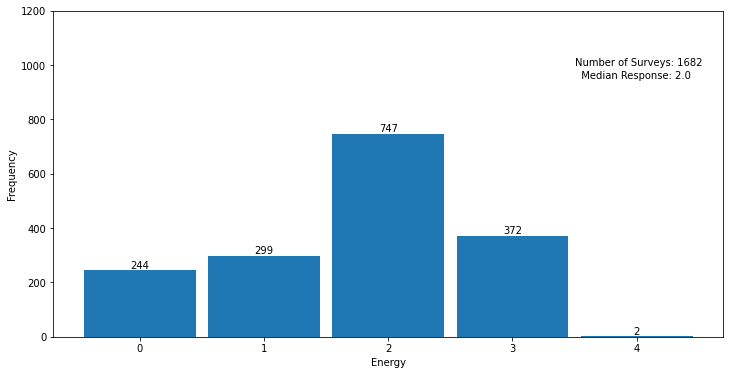

In [6]:
for question in ['Content','Stress','Lonely','Sad','Energy']:
    fig, ax = plt.subplots(figsize=(12,6))
    n,bins,patches = plt.hist(sleep_survey[question],bins=[-0.5,0.5,1.5,2.5,3.5,4.5],rwidth=0.9)
    ax.set_xlabel(question)
    ax.set_ylabel('Frequency')
    ax.set_ylim([0,1200])
    
    ax.text(3.5,1000,f'Number of Surveys: {len(sleep_survey[question])}')
    ax.text(3.5,950,f'  Median Response: {np.nanmedian(sleep_survey[question])}')
    
    label_hist(n, bins)
        
    plt.show()
    plt.close()

## Sleep
Sleep portions of the survey includes:
- TST: total sleep time
- SOL: sleep onset latency
- NAW: number of awakenings
- Restful: Likert scale 0-3

In [7]:
import scipy.stats as st

### General Histogram

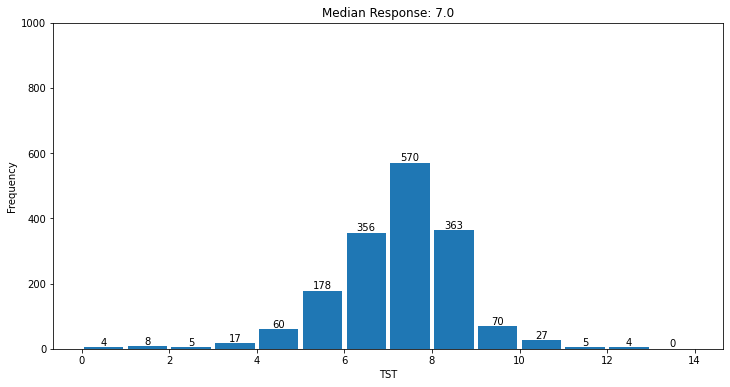

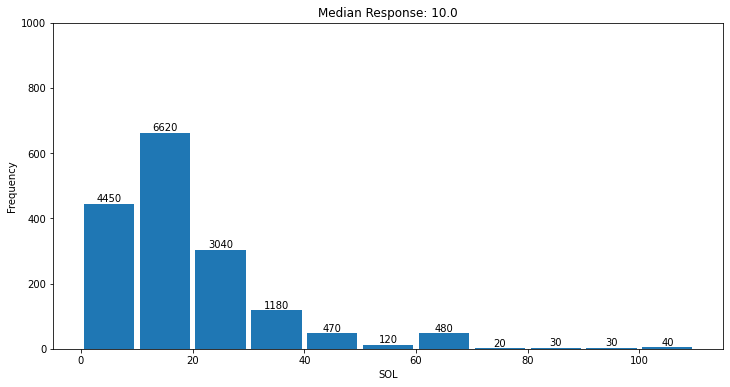

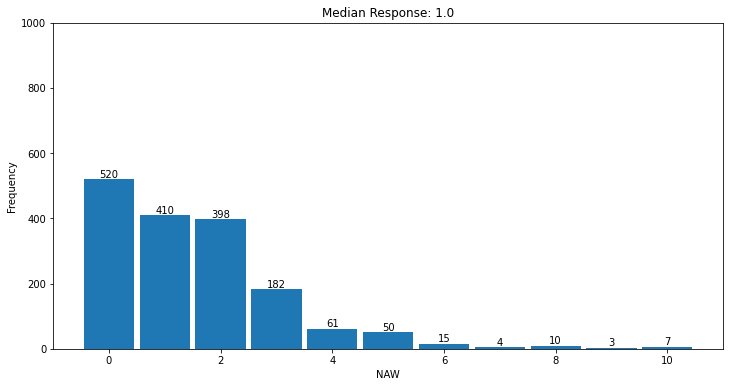

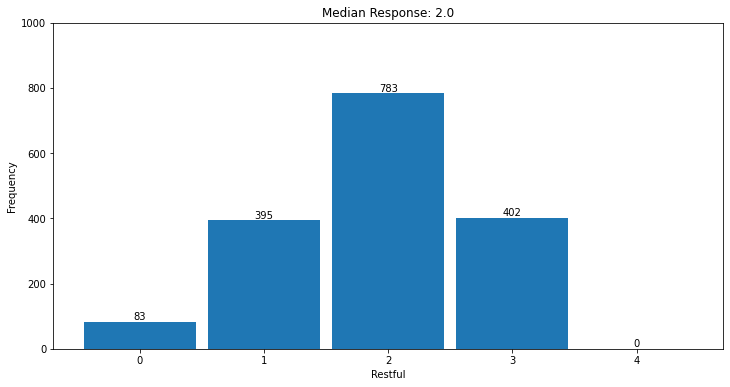

In [8]:
questions = ['TST','SOL','NAW','Restful']
bin_list = [np.arange(0,15,1),
           np.arange(0,120,10),
           np.arange(-0.5,11.5,1),
           [-0.5,0.5,1.5,2.5,3.5,4.5]]

for question, bins in zip(questions, bin_list):
    fig, ax = plt.subplots(figsize=(12,6))
    n,bins,patches = plt.hist(sleep_survey[question],bins=bins,rwidth=0.9,align='mid')
    ax.set_xlabel(question)
    ax.set_ylabel('Frequency')
    ax.set_ylim([0,1000])
    
    ax.set_title(f'Median Response: {np.nanmedian(sleep_survey[question])}')
    
    label_hist(n, bins)
        
    plt.show()
    plt.close()

### Per Participant Responses

In [15]:
first_date = datetime(2020,5,13) # beiwe surveys were fixed this day
end_date = datetime(2020,9,1) # this was the first sampling appointment - some pts might have turned off beiwe
maxDailySurveys = np.busday_count(first_date.date(), end_date.date(), weekmask='Sun Mon Wed Fri')
print(f'Maximum \"Daily\" Surveys: {maxDailySurveys}')
maxWeeklySurveys = np.busday_count(first_date.date(), end_date.date(), weekmask='Sat')
print(f'Maximum Weekly Surveys: {maxWeeklySurveys}')

Maximum "Daily" Surveys: 64
Maximum Weekly Surveys: 16


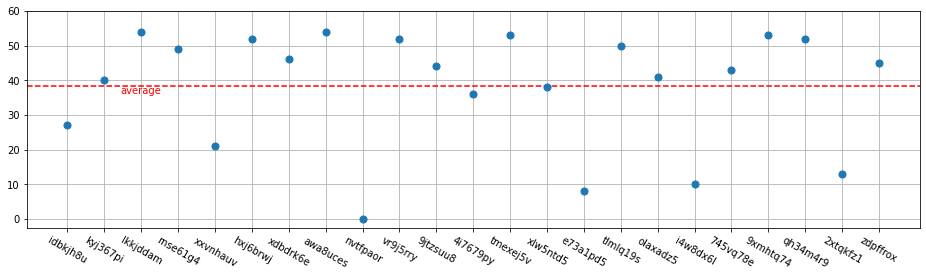

In [9]:
# Number of surveys submitted
bid = []
surveys_submitted = []
# Looping through beacon participants only
for beiwe in beacon_data['Beiwe'].unique():
    survey_by_beiwe = sleep_survey[sleep_survey['ID'] == beiwe]
    bid.append(beiwe)
    surveys_submitted.append(len(survey_by_beiwe))

fig, ax = plt.subplots(figsize=(16,4))
# scattering number of surveys submitted per participant
ax.scatter(bid,surveys_submitted,s=50,zorder=10)
ax.set_yticks(np.arange(0,70,10))
plt.xticks(rotation=-30)
ax.grid(zorder=1)
# adding average line
ax.axhline(np.nanmean(surveys_submitted),color='red',linestyle='dashed')
ax.text(bid[2],np.nanmean(surveys_submitted),'average',va='top',ha='center',color='red')
#percentage
plt.show()
plt.close()

### Differences in the Day of the Week


Restricted to Beacon Participants Only: False


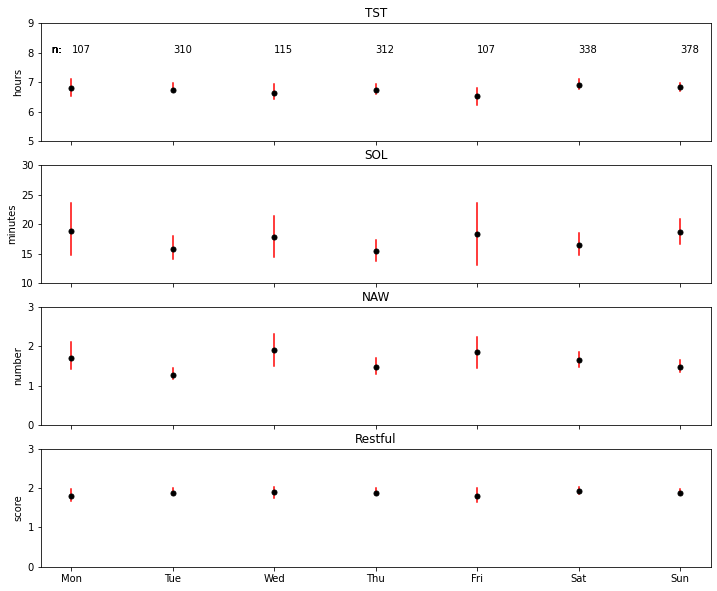

Restricted to Beacon Participants Only: True


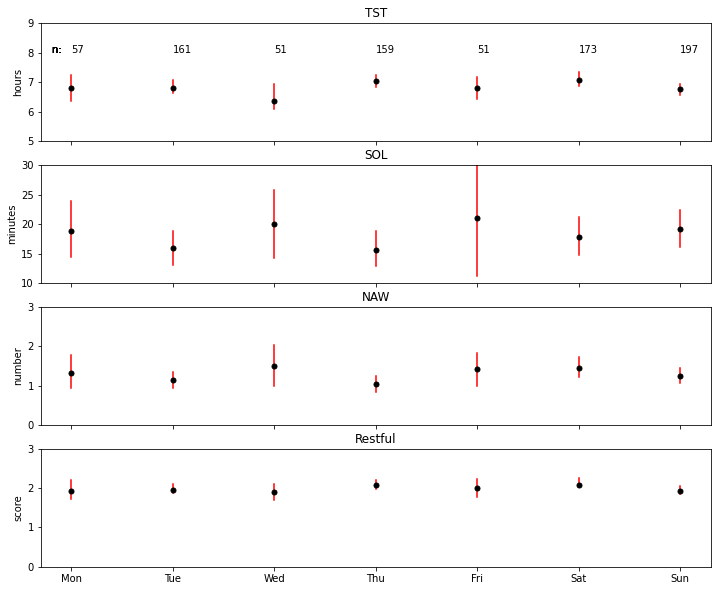

In [199]:
# grouping by night sleep (survey date - 1 day)
sleep_survey['DoW'] = (sleep_survey.index - timedelta(days=1)).strftime('%a')
# all participants
sleep_survey_dow = sleep_survey.groupby(['DoW']).mean()
sleep_survey_dow = sleep_survey_dow.reindex(["Mon", "Tue", "Wed","Thu","Fri","Sat",'Sun'])
# beacon-holding participants only
sleep_survey_restricted = sleep_survey[sleep_survey['ID'].isin(bid)]
sleep_survey_dow_beacon = sleep_survey_restricted.groupby(['DoW']).mean()
sleep_survey_dow_beacon = sleep_survey_dow_beacon.reindex(["Mon", "Tue", "Wed","Thu","Fri","Sat",'Sun'])
# looping through both dataframes
for df, restricted in zip([sleep_survey_dow,sleep_survey_dow_beacon],[False,True]):
    print(f'Restricted to Beacon Participants Only: {restricted}')
    fig, axes = plt.subplots(4,1,figsize=(12,10),sharex=True)
    i=0
    limits = [[5,9],[10,30],[0,3],[0,3]]
    for question, limit, ylabel in zip(['TST','SOL','NAW','Restful'],limits,['hours','minutes','number','score']):

        sleep_survey_dow_plot = df[df[question] >= 0]
        # Scattering for day of week
        axes[i].scatter(sleep_survey_dow_plot.index,sleep_survey_dow_plot[question],s=25,color='black',zorder=10)
        axes[i].set_title(question)
        axes[i].set_ylim(limit)
        axes[i].set_ylabel(ylabel)

        # Adding 95% CI
        for day in sleep_survey['DoW'].unique():
            sleep_survey_by_day = sleep_survey[sleep_survey['DoW'] == day]
            if restricted:
                sleep_survey_by_day = sleep_survey_by_day[sleep_survey_by_day['ID'].isin(bid)]

            sleep_survey_by_day = sleep_survey_by_day[sleep_survey_by_day[question] >= 0]
            ci = st.t.interval(0.95, len(sleep_survey_by_day[question])-1,
                          loc=np.mean(sleep_survey_by_day[question]),
                          scale=st.sem(sleep_survey_by_day[question]))

            axes[i].plot([day,day],ci,color='red',zorder=1) 
            # adding number of surveys on top figure
            if question == 'TST':
                axes[i].text('Mon',8,'n:   ',ha='right')
                axes[i].text(day,8,len(sleep_survey_by_day))
        i += 1

    plt.subplots_adjust(wspace=0,hspace=0.2)
    plt.show()
    plt.close()

### Per Participant Responses

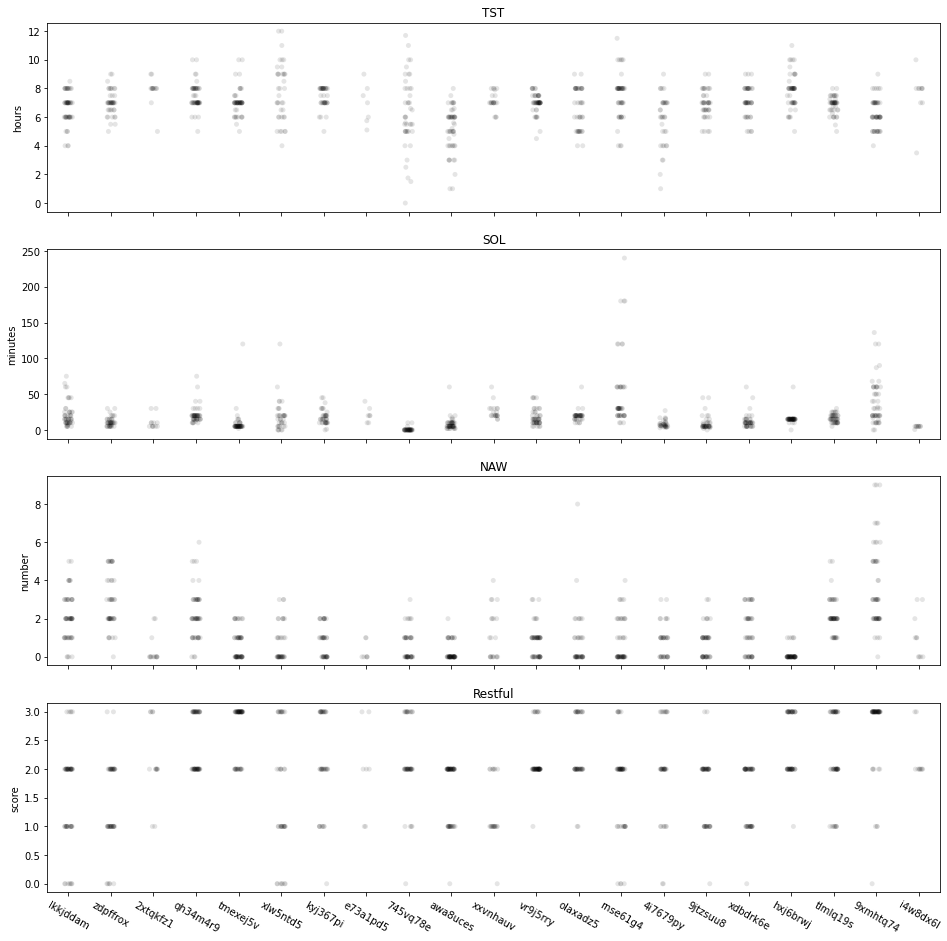

In [194]:
# Sleep metrics
fig, axes = plt.subplots(4,1,figsize=(16,16),sharex=True)
sleep_survey_restricted = sleep_survey[sleep_survey['ID'].isin(bid)]
i = 0
for question, ylabel in zip(['TST','SOL','NAW','Restful'],['hours','minutes','number','score']):
    sleep_survey_restricted_plot = sleep_survey_restricted[sleep_survey_restricted[question] >= 0]
    sns.stripplot(x='ID',y=question,data=sleep_survey_restricted_plot,color='black',alpha=0.1,ax=axes[i])
    axes[i].set_xlabel('')
    axes[i].set_ylabel(ylabel)
    axes[i].set_title(question)
    
    i += 1
    
plt.xticks(rotation=-30)
plt.subplots_adjust(hspace=0.2)
plt.show()
plt.close()

# Beacon and Survey Data

Beiwe ID: kyj367pi
	Number of beacon datapoints (5 min):		25057
	Number of surveys submitted (daily):		40


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice


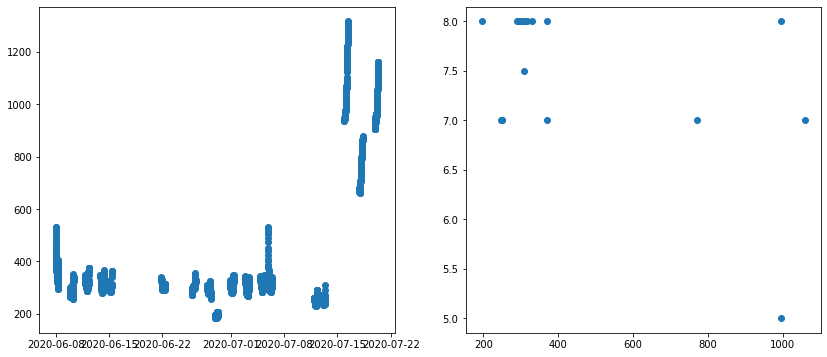

	Number of beacon datapoints (restricted):	5293
Beiwe ID: lkkjddam
	Number of beacon datapoints (5 min):		28225
	Number of surveys submitted (daily):		54


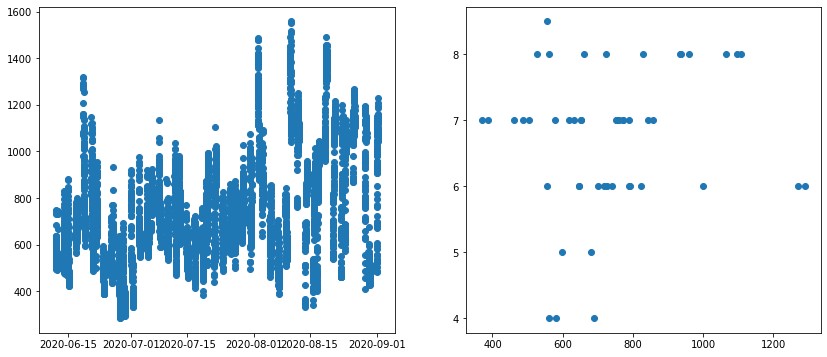

	Number of beacon datapoints (restricted):	7069
Beiwe ID: rnse61g4
	Number of beacon datapoints (5 min):		20737
	Number of surveys submitted (daily):		49


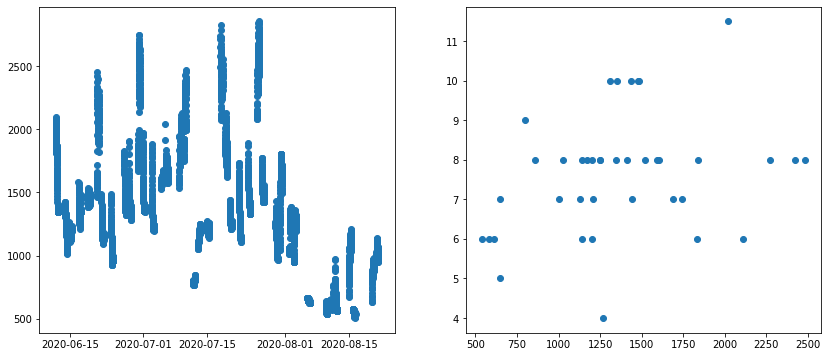

	Number of beacon datapoints (restricted):	5655
Beiwe ID: xxvnhauv
	Number of beacon datapoints (5 min):		22980
	Number of surveys submitted (daily):		21


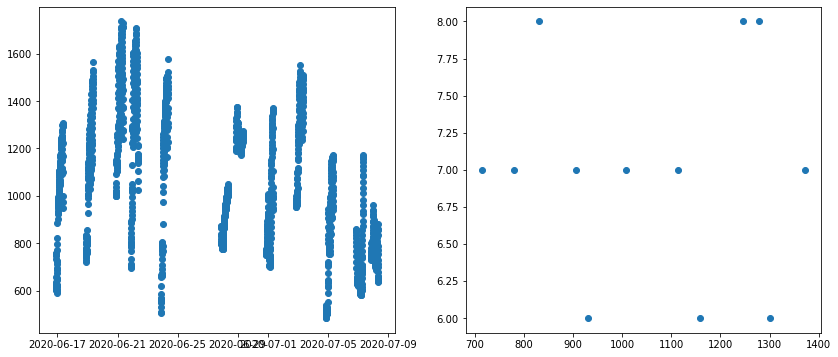

	Number of beacon datapoints (restricted):	1740
Beiwe ID: hxj6brwj
	Number of beacon datapoints (5 min):		14689
	Number of surveys submitted (daily):		52


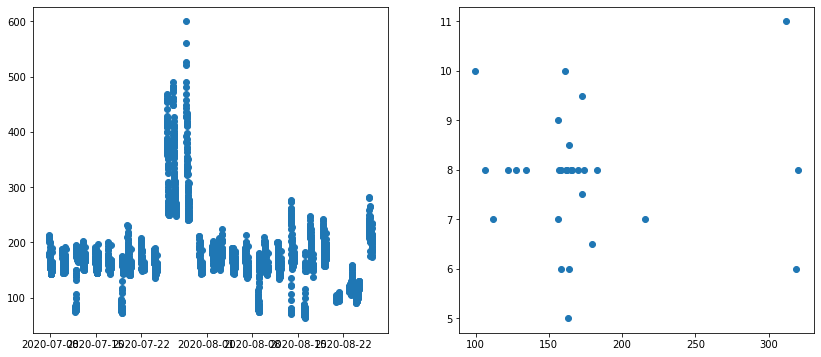

	Number of beacon datapoints (restricted):	4205
Beiwe ID: xdbdrk6e
	Number of beacon datapoints (5 min):		22177
	Number of surveys submitted (daily):		46


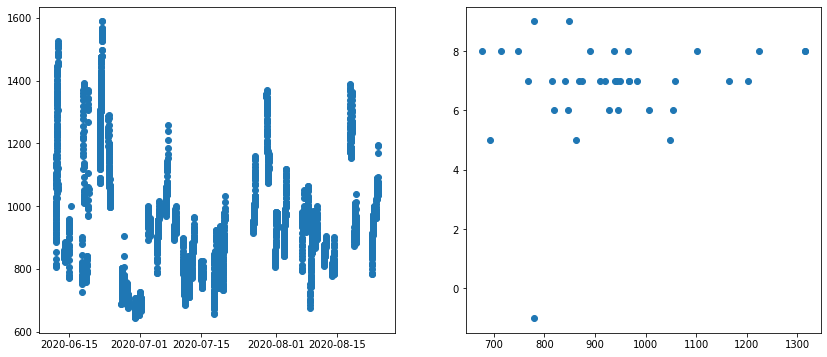

	Number of beacon datapoints (restricted):	5547
Beiwe ID: awa8uces
	Number of beacon datapoints (5 min):		23329
	Number of surveys submitted (daily):		54


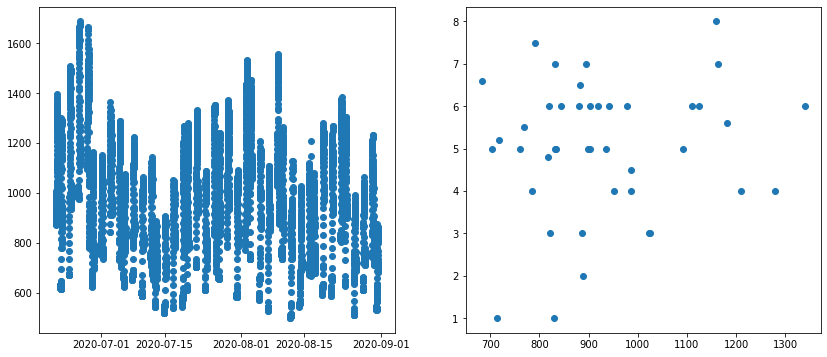

	Number of beacon datapoints (restricted):	6090
Beiwe ID: nvtfpaor
	Number of beacon datapoints (5 min):		23905
	Number of surveys submitted (daily):		0
	Number of beacon datapoints (restricted):	0
Beiwe ID: vr9j5rry
	Number of beacon datapoints (5 min):		26209
	Number of surveys submitted (daily):		52


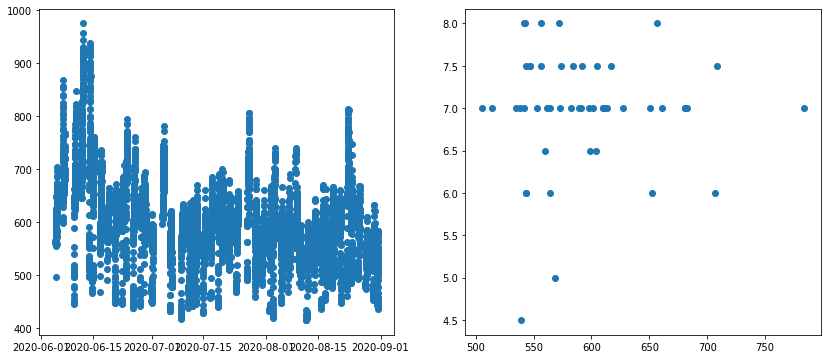

	Number of beacon datapoints (restricted):	7250
Beiwe ID: 9jtzsuu8
	Number of beacon datapoints (5 min):		23329
	Number of surveys submitted (daily):		44


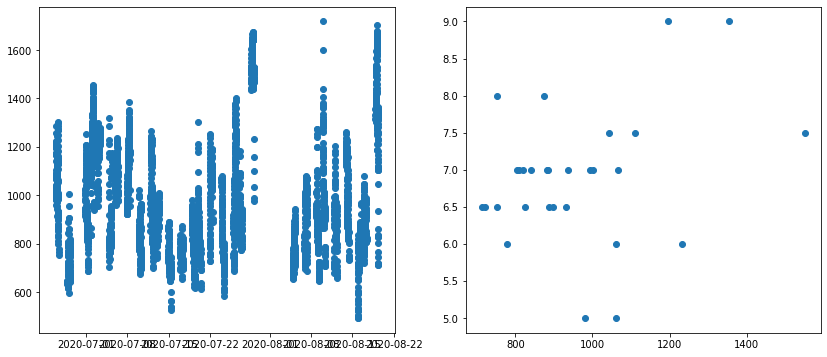

	Number of beacon datapoints (restricted):	4930
Beiwe ID: 4i7679py
	Number of beacon datapoints (5 min):		14977
	Number of surveys submitted (daily):		36


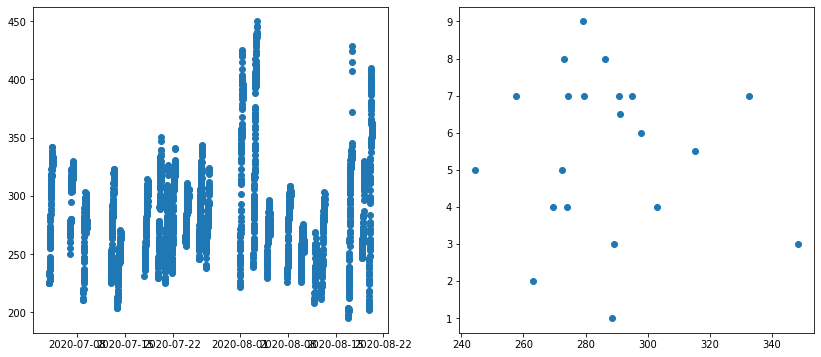

	Number of beacon datapoints (restricted):	3190
Beiwe ID: tmexej5v
	Number of beacon datapoints (5 min):		20449
	Number of surveys submitted (daily):		53


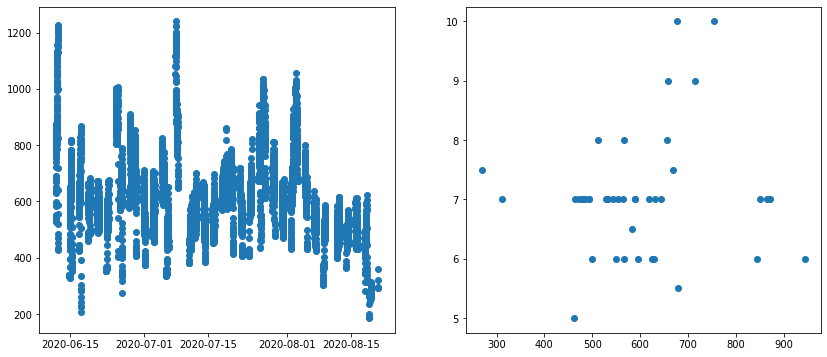

	Number of beacon datapoints (restricted):	5837
Beiwe ID: xlw5ntd5
	Number of beacon datapoints (5 min):		27937
	Number of surveys submitted (daily):		38


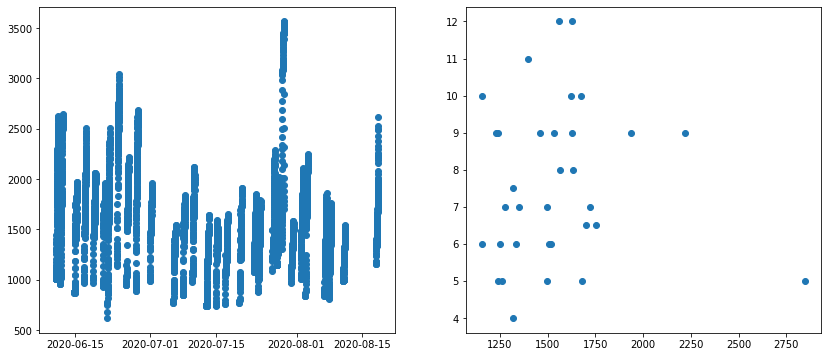

	Number of beacon datapoints (restricted):	5075
Beiwe ID: e73a1pd5
	Number of beacon datapoints (5 min):		3169
	Number of surveys submitted (daily):		8


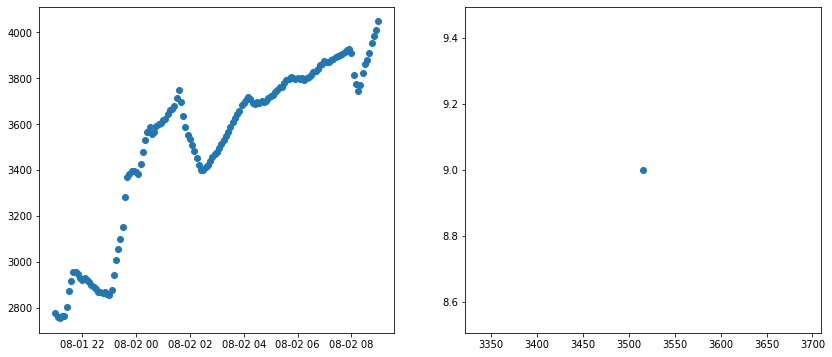

	Number of beacon datapoints (restricted):	145
Beiwe ID: tlmlq19s
	Number of beacon datapoints (5 min):		28225
	Number of surveys submitted (daily):		50


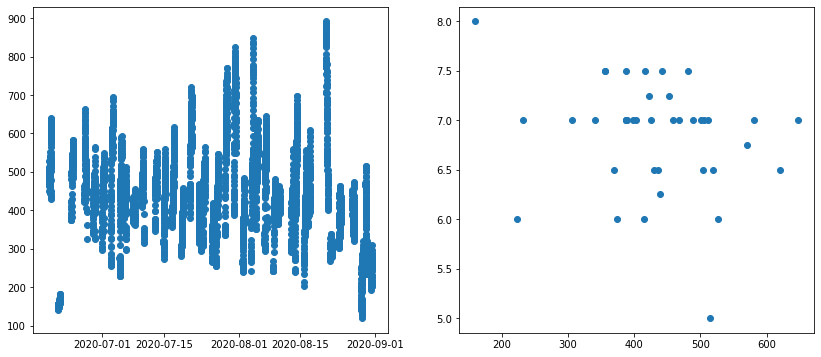

	Number of beacon datapoints (restricted):	5909
Beiwe ID: olaxadz5
	Number of beacon datapoints (5 min):		19585
	Number of surveys submitted (daily):		41


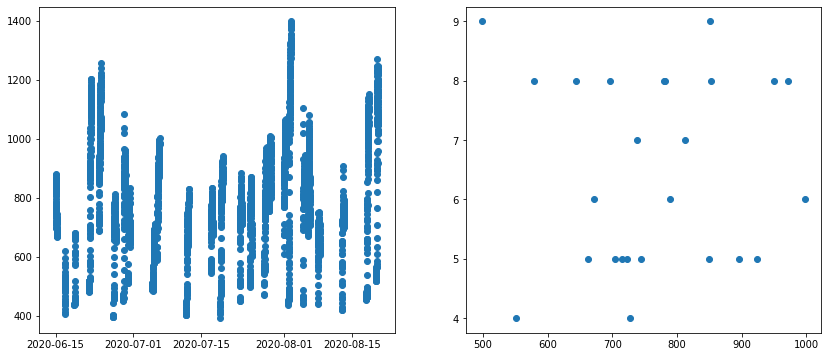

	Number of beacon datapoints (restricted):	4169
Beiwe ID: i4w8dx6l
	Number of beacon datapoints (5 min):		21313
	Number of surveys submitted (daily):		10


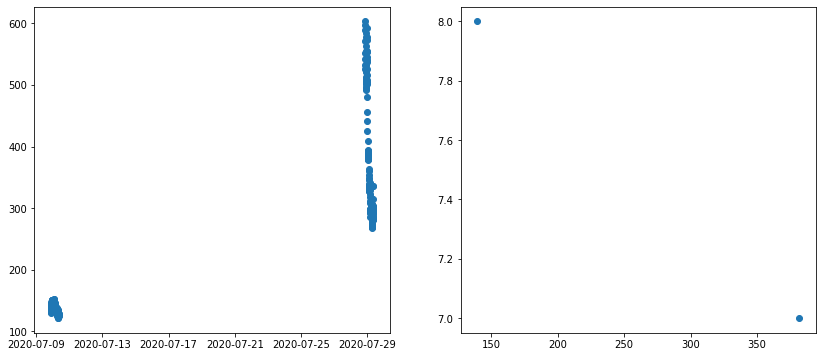

	Number of beacon datapoints (restricted):	870
Beiwe ID: 745vq78e
	Number of beacon datapoints (5 min):		26785
	Number of surveys submitted (daily):		43


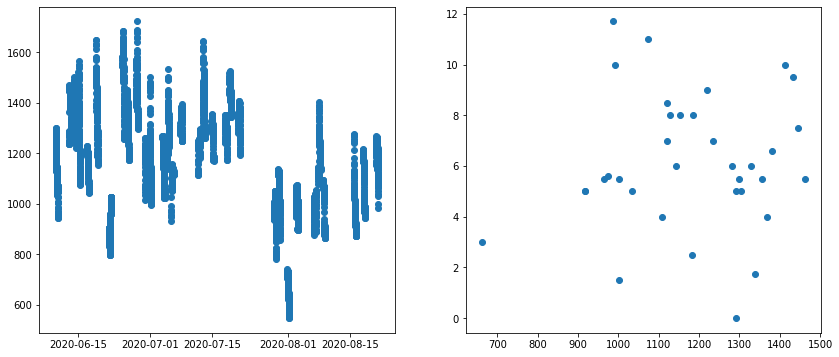

	Number of beacon datapoints (restricted):	5800
Beiwe ID: 9xmhtq74
	Number of beacon datapoints (5 min):		27361
	Number of surveys submitted (daily):		53


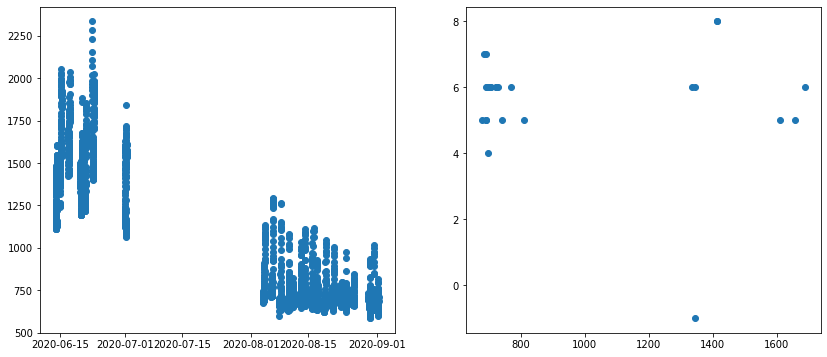

	Number of beacon datapoints (restricted):	6815
Beiwe ID: qh34m4r9
	Number of beacon datapoints (5 min):		18433
	Number of surveys submitted (daily):		52


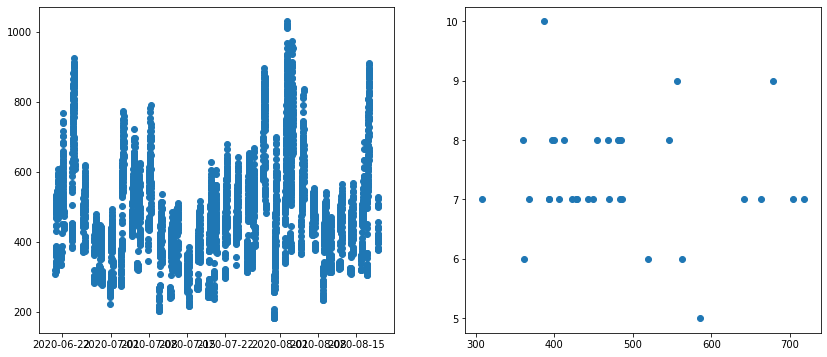

	Number of beacon datapoints (restricted):	5257
Beiwe ID: 2xtqkfz1
	Number of beacon datapoints (5 min):		2017
	Number of surveys submitted (daily):		13


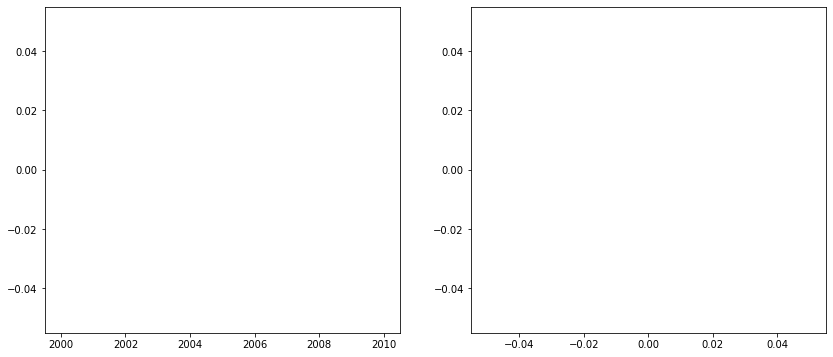

	Number of beacon datapoints (restricted):	0
Beiwe ID: zdpffrox
	Number of beacon datapoints (5 min):		29953
	Number of surveys submitted (daily):		45


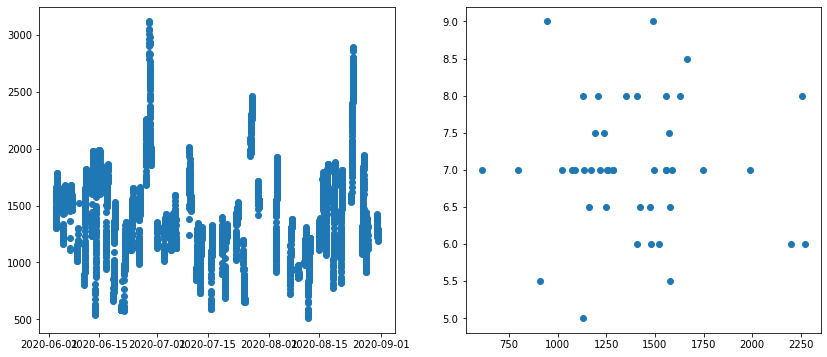

	Number of beacon datapoints (restricted):	6525


In [103]:
beacon_data_by_survey = pd.DataFrame() # dataframe with nightly data for every participant corresponding to surveys
for beiwe in beacon_data['Beiwe'].unique():
    # printing information about data availability
    beacon_by_beiwe = beacon_data[beacon_data['Beiwe'] == beiwe]
    print(f'Beiwe ID: {beiwe}\n\tNumber of beacon datapoints (5 min):\t\t{len(beacon_by_beiwe)}')
    survey_by_beiwe = sleep_survey[sleep_survey['ID'] == beiwe]
    print(f'\tNumber of surveys submitted (daily):\t\t{len(survey_by_beiwe)}')
    
    beacon_by_beiwe_by_survey = pd.DataFrame() # dataframe to return per beacon
    beacon_by_beiwe_by_survey_summary = pd.DataFrame() # dataframe with summary values for pollutants
    for i in range(len(survey_by_beiwe)):
        survey_date = survey_by_beiwe.index[i] # timestamp of when survey was taken
        start_date = survey_date-timedelta(days=1) # subtracting a day to get to the date they went to bed
        
        # assuming participants were asleep 21:00 - 9:00 (12 hours)
        start_time = datetime(start_date.year,start_date.month,start_date.day,21,0,0)
        end_time = datetime(survey_date.year,survey_date.month,survey_date.day,9,0,0)
        
        # restricting data to the night
        nightly_beacon_data = beacon_by_beiwe[start_time:end_time]
        beacon_by_beiwe_by_survey = beacon_by_beiwe_by_survey.append(nightly_beacon_data)
        
        # summarizing key pollutants
        data={'morning':[start_date.date()],'CO2_mean':[np.nanmean(nightly_beacon_data['CO2'])]}
        beacon_by_beiwe_by_survey_summary = beacon_by_beiwe_by_survey_summary.append(pd.DataFrame(data=data))
        
    print(f'\tNumber of beacon datapoints (restricted):\t{len(beacon_by_beiwe_by_survey)}')
    if len(beacon_by_beiwe_by_survey_summary) > 0:
        fig, axes = plt.subplots(1,2,figsize=(14,6))
        ax = axes[0]
        beacon_by_beiwe_by_survey.sort_index(inplace=True)
        ax.scatter(beacon_by_beiwe_by_survey.index,beacon_by_beiwe_by_survey['CO2'])

        ax = axes[1]
        ax.scatter(beacon_by_beiwe_by_survey_summary['CO2_mean'],survey_by_beiwe['TST'])

        plt.show()
        plt.close()
        
    beacon_data_by_survey = beacon_data_by_survey.append(beacon_by_beiwe_by_survey)